# Feature Engineering and Classifier Evaluation


## Thyroid dataset classification problem

- Url: http://archive.ics.uci.edu/ml/datasets/thyroid+disease

Thyroid disease records supplied by the Garavan Institute and J. Ross
Quinlan, New South Wales Institute, Syndney, Australia.

    hyperthyroid, T3 toxic, goitre, secondary toxic,
    negative.			|  classes

    age:				continuous.
    sex:				M, F.
    on thyroxine:			f, t.
    query on thyroxine:		f, t.
    on antithyroid medication:	f, t.
    sick:				f, t.
    pregnant:			f, t.
    thyroid surgery:		f, t.
    I131 treatment:			f, t.
    query hypothyroid:		f, t.
    query hyperthyroid:		f, t.
    lithium:			f, t.
    goitre:				f, t.
    tumor:				f, t.
    hypopituitary:			f, t.
    psych:				f, t.
    TSH measured:			f, t.
    TSH:				continuous.
    T3 measured:			f, t.
    T3:				continuous.
    TT4 measured:			f, t.
    TT4:				continuous.
    T4U measured:			f, t.
    T4U:				continuous.
    FTI measured:			f, t.
    FTI:				continuous.
    TBG measured:			f, t.
    TBG:				continuous.
    referral source:		WEST, STMW, SVHC, SVI, SVHD, other.

In [60]:
import numpy as np
import pandas as pd

# download the file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allhyper.data"
dataset = pd.read_csv(url, comment="|", header=None)
# try removing comment and header params

In [61]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70,M,f,f,f,f,f,f,f,f,...,t,155,t,1.05,t,148,f,?,SVI,negative.
2796,73,M,f,t,f,f,f,f,f,f,...,t,63,t,0.88,t,72,f,?,other,negative.
2797,75,M,f,f,f,f,f,f,f,f,...,t,147,t,0.8,t,183,f,?,other,negative.
2798,60,F,f,f,f,f,f,f,f,f,...,t,100,t,0.83,t,121,f,?,other,negative.


In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2800 non-null   object
 1   1       2800 non-null   object
 2   2       2800 non-null   object
 3   3       2800 non-null   object
 4   4       2800 non-null   object
 5   5       2800 non-null   object
 6   6       2800 non-null   object
 7   7       2800 non-null   object
 8   8       2800 non-null   object
 9   9       2800 non-null   object
 10  10      2800 non-null   object
 11  11      2800 non-null   object
 12  12      2800 non-null   object
 13  13      2800 non-null   object
 14  14      2800 non-null   object
 15  15      2800 non-null   object
 16  16      2800 non-null   object
 17  17      2800 non-null   object
 18  18      2800 non-null   object
 19  19      2800 non-null   object
 20  20      2800 non-null   object
 21  21      2800 non-null   object
 22  22      2800 non-null   

In [63]:
dataset.describe().T

,count,unique,top,freq
0,2800,94,59,75
1,2800,3,F,1830
2,2800,2,f,2470
3,2800,2,f,2760
4,2800,2,f,2766
5,2800,2,f,2690
6,2800,2,f,2759
7,2800,2,f,2761
8,2800,2,f,2752
9,2800,2,f,2637


In [64]:
# Check all feature values

num_inst, num_features = dataset.shape

for f in range(num_features):
    print (f, np.unique(dataset.iloc[:,f]))

0 ['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '30' '31' '32' '33' '34' '35' '36'
 '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '455' '46' '47' '48'
 '49' '5' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '6' '60' '61'
 '62' '63' '64' '65' '66' '67' '68' '69' '7' '70' '71' '72' '73' '74' '75'
 '76' '77' '78' '79' '8' '80' '81' '82' '83' '84' '85' '86' '87' '88' '89'
 '90' '91' '92' '93' '94' '?']
1 ['?' 'F' 'M']
2 ['f' 't']
3 ['f' 't']
4 ['f' 't']
5 ['f' 't']
6 ['f' 't']
7 ['f' 't']
8 ['f' 't']
9 ['f' 't']
10 ['f' 't']
11 ['f' 't']
12 ['f' 't']
13 ['f' 't']
14 ['f' 't']
15 ['f' 't']
16 ['f' 't']
17 ['0.005' '0.01' '0.015' '0.02' '0.025' '0.03' '0.035' '0.04' '0.045'
 '0.05' '0.055' '0.06' '0.065' '0.07' '0.08' '0.09' '0.1' '0.12' '0.13'
 '0.14' '0.15' '0.16' '0.17' '0.19' '0.2' '0.21' '0.22' '0.23' '0.24'
 '0.25' '0.26' '0.27' '0.28' '0.29' '0.3' '0.31' '0.32' '0.33' '0.34'
 '0.35' '0.36' '0.37' '0.38' '0.39' '0.4

# Issues with this data

1. Binary categorical features
1. k-nary categorical features
1. k-nary categorical class label
1. features with unique values
1. missing values

## Strategies:

1. Binary categorical features
   - map to 0-1
1. k-nary categorical features
   - one-hot-encoding, ie., one binary variable for each possible value
1. k-nary categorical class label
   - map to numerical id
1. features with unique values
   - remove (home work)
1. missing values
   - replace with mean if numerical
   - replace with mode if categorical
   - add binary feature (we will use this strategy)

# First split train vs. test !!!!!!!!

In [65]:
from sklearn.model_selection import train_test_split

# drop label columns
X = dataset.drop(columns=[29])

# isolate y
y = dataset[29]

X_train_80, X_test, y_train_80, y_test = train_test_split( X, y, 
                                                         test_size=0.20)

In [66]:
X.shape, X_train_80.shape, X_test.shape

((2800, 29), (2240, 29), (560, 29))

In [67]:
y.shape

(2800,)

## Process X

In [68]:
X_train_80.describe().T

,count,unique,top,freq
0,2240,92,59,64
1,2240,3,F,1459
2,2240,2,f,1977
3,2240,2,f,2206
4,2240,2,f,2211
5,2240,2,f,2144
6,2240,2,f,2205
7,2240,2,f,2205
8,2240,2,f,2204
9,2240,2,f,2112


In [69]:
X_train_80.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
2448,69,?,f,f,f,f,f,f,f,f,...,1.5,f,?,f,?,f,?,f,?,other
1568,73,F,f,f,f,f,f,f,f,f,...,1.6,t,110,t,0.98,t,112,f,?,SVI
1581,22,F,f,f,f,f,f,f,f,f,...,1.9,t,83,t,0.74,t,112,f,?,SVI
214,60,M,f,f,f,f,f,f,f,f,...,?,t,88,t,0.95,t,92,f,?,SVI
2481,64,F,f,f,f,f,f,f,f,t,...,1.4,t,92,t,0.81,t,114,f,?,SVI


## Handle numerical features

In [70]:
# heuristic strategy for categorical vs. numerical variables
is_numerical  = np.array( [ len(np.unique(X_train_80[col]))>10 for col in X_train_80 ] )
numerical_idx = np.flatnonzero(is_numerical) 


# see pandas.select_dtypes

In [71]:
print (is_numerical)
print (numerical_idx)
print ("Number of numerical features:", sum(is_numerical))

[ True False False False False False False False False False False False
 False False False False False  True False  True False  True False  True
 False  True False False False]
[ 0 17 19 21 23 25]
Number of numerical features: 6


In [72]:
# convert numerical to floats (keep NaN)
new_X = X_train_80[ numerical_idx ].apply(pd.to_numeric, errors='coerce')
#  invalid parsing will be set as NaN.

In [73]:
new_X.head(10)

,0,17,19,21,23,25
2448,69.0,NaN,1.5,NaN,NaN,NaN
1568,73.0,1.80,1.6,110.0,0.98,112.0
1581,22.0,2.90,1.9,83.0,0.74,112.0
214,60.0,5.20,NaN,88.0,0.95,92.0
2481,64.0,0.68,1.4,92.0,0.81,114.0
313,63.0,1.40,1.4,90.0,0.91,100.0
2231,41.0,2.00,2.8,110.0,1.14,97.0
1575,60.0,1.60,1.7,153.0,1.06,144.0
826,44.0,NaN,NaN,118.0,0.95,124.0
983,59.0,4.90,1.4,96.0,0.88,109.0


In [74]:
new_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 2448 to 1485
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2239 non-null   float64
 1   17      2017 non-null   float64
 2   19      1778 non-null   float64
 3   21      2103 non-null   float64
 4   23      2012 non-null   float64
 5   25      2014 non-null   float64
dtypes: float64(6)
memory usage: 122.5 KB


In [75]:
X_train_80.loc[411,numerical_idx]

0        7
17      15
19       ?
21     137
23    1.03
25     133
Name: 411, dtype: object

In [76]:
# extract NaNs
new_X.isna().astype(int).head(10)

,0,17,19,21,23,25
2448,0,1,0,1,1,1
1568,0,0,0,0,0,0
1581,0,0,0,0,0,0
214,0,0,1,0,0,0
2481,0,0,0,0,0,0
313,0,0,0,0,0,0
2231,0,0,0,0,0,0
1575,0,0,0,0,0,0
826,0,1,1,0,0,0
983,0,0,0,0,0,0


In [77]:
new_X = pd.concat( [new_X, new_X.isna().astype(int)], 
               axis=1)

new_X.head(10)

,0,17,19,21,23,25,0,17,19,21,23,25
2448,69.0,NaN,1.5,NaN,NaN,NaN,0,1,0,1,1,1
1568,73.0,1.80,1.6,110.0,0.98,112.0,0,0,0,0,0,0
1581,22.0,2.90,1.9,83.0,0.74,112.0,0,0,0,0,0,0
214,60.0,5.20,NaN,88.0,0.95,92.0,0,0,1,0,0,0
2481,64.0,0.68,1.4,92.0,0.81,114.0,0,0,0,0,0,0
313,63.0,1.40,1.4,90.0,0.91,100.0,0,0,0,0,0,0
2231,41.0,2.00,2.8,110.0,1.14,97.0,0,0,0,0,0,0
1575,60.0,1.60,1.7,153.0,1.06,144.0,0,0,0,0,0,0
826,44.0,NaN,NaN,118.0,0.95,124.0,0,1,1,0,0,0
983,59.0,4.90,1.4,96.0,0.88,109.0,0,0,0,0,0,0


In [78]:
new_X.shape

(2240, 12)

In [79]:
# fill NaN
new_X = new_X.fillna(0.0)
# try with mean/median

new_X.head()

,0,17,19,21,23,25,0,17,19,21,23,25
2448,69.0,0.00,1.5,0.0,0.00,0.0,0,1,0,1,1,1
1568,73.0,1.80,1.6,110.0,0.98,112.0,0,0,0,0,0,0
1581,22.0,2.90,1.9,83.0,0.74,112.0,0,0,0,0,0,0
214,60.0,5.20,0.0,88.0,0.95,92.0,0,0,1,0,0,0
2481,64.0,0.68,1.4,92.0,0.81,114.0,0,0,0,0,0,0


## One-hot encoding for the remaining features

 - see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
 

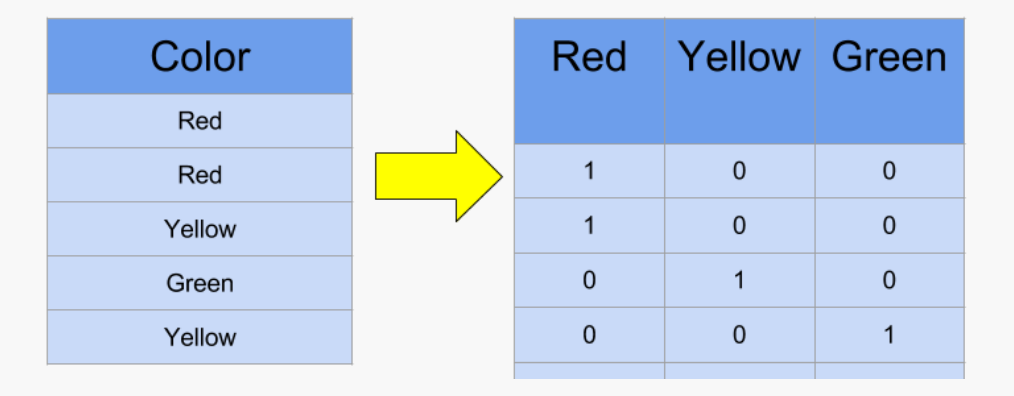

In [80]:
categorical_idx = np.flatnonzero(is_numerical==False)

In [81]:
categorical_idx

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18,
       20, 22, 24, 26, 27, 28])

In [82]:
len(categorical_idx)

23

In [83]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder(sparse_output=False)
oh.fit(X_train_80[categorical_idx])

OneHotEncoder(sparse_output=False)

In [84]:
oh.categories_

[array(['?', 'F', 'M'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f'], dtype=object),
 array(['?'], dtype=object),
 array(['STMW', 'SVHC', 'SVHD', 'SVI', 'other'], dtype=object)]

In [85]:
encoded = oh.transform(X_train_80[categorical_idx])
encoded.shape

(2240, 48)

In [86]:
encoded

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [87]:
oh.get_feature_names_out()

array(['x0_?', 'x0_F', 'x0_M', 'x1_f', 'x1_t', 'x2_f', 'x2_t', 'x3_f',
       'x3_t', 'x4_f', 'x4_t', 'x5_f', 'x5_t', 'x6_f', 'x6_t', 'x7_f',
       'x7_t', 'x8_f', 'x8_t', 'x9_f', 'x9_t', 'x10_f', 'x10_t', 'x11_f',
       'x11_t', 'x12_f', 'x12_t', 'x13_f', 'x13_t', 'x14_f', 'x14_t',
       'x15_f', 'x15_t', 'x16_f', 'x16_t', 'x17_f', 'x17_t', 'x18_f',
       'x18_t', 'x19_f', 'x19_t', 'x20_f', 'x21_?', 'x22_STMW',
       'x22_SVHC', 'x22_SVHD', 'x22_SVI', 'x22_other'], dtype=object)

In [88]:
type(encoded)

numpy.ndarray

In [89]:
encoded.shape

(2240, 48)

In [90]:
len(oh.get_feature_names_out())

48

In [91]:
for i,col in enumerate(oh.get_feature_names_out()):
    new_X[col] = encoded[:,i]

In [92]:
new_X

,0,17,19,21,23,25,0,17,19,21,...,x18_t,x19_f,x19_t,x20_f,x21_?,x22_STMW,x22_SVHC,x22_SVHD,x22_SVI,x22_other
2448,69.0,0.00,1.5,0.0,0.00,0.0,0,1,0,1,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1568,73.0,1.80,1.6,110.0,0.98,112.0,0,0,0,0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1581,22.0,2.90,1.9,83.0,0.74,112.0,0,0,0,0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
214,60.0,5.20,0.0,88.0,0.95,92.0,0,0,1,0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2481,64.0,0.68,1.4,92.0,0.81,114.0,0,0,0,0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,70.0,0.15,1.5,85.0,0.91,94.0,0,0,0,0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
443,41.0,0.00,0.0,0.0,0.00,0.0,0,1,1,1,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2489,58.0,1.80,0.0,63.0,0.86,73.0,0,0,1,0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
104,57.0,0.00,0.0,0.0,0.00,0.0,0,1,1,1,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [93]:
# check
X_train_80.head(10)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
2448,69,?,f,f,f,f,f,f,f,f,...,1.5,f,?,f,?,f,?,f,?,other
1568,73,F,f,f,f,f,f,f,f,f,...,1.6,t,110,t,0.98,t,112,f,?,SVI
1581,22,F,f,f,f,f,f,f,f,f,...,1.9,t,83,t,0.74,t,112,f,?,SVI
214,60,M,f,f,f,f,f,f,f,f,...,?,t,88,t,0.95,t,92,f,?,SVI
2481,64,F,f,f,f,f,f,f,f,t,...,1.4,t,92,t,0.81,t,114,f,?,SVI
313,63,M,f,f,f,t,f,f,f,f,...,1.4,t,90,t,0.91,t,100,f,?,SVI
2231,41,M,f,f,f,f,f,f,f,f,...,2.8,t,110,t,1.14,t,97,f,?,SVI
1575,60,F,f,f,f,f,f,f,f,f,...,1.7,t,153,t,1.06,t,144,f,?,SVI
826,44,M,f,f,f,f,f,f,f,f,...,?,t,118,t,0.95,t,124,f,?,other
983,59,M,f,f,f,f,f,f,f,f,...,1.4,t,96,t,0.88,t,109,f,?,SVI


**Note.** With one-hot-encoding (1HE) the number of columns may explode leading to extremely costly training (consider for instance the case of a variable with 100 distinct values). In these case, we can use 1HE just for the top k most frequent values. One way to achieve this is to replace non frequent values with a special "other" value and then applay 1HE.

# Recap

In [94]:
import numpy as np
import pandas as pd

# download the file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allhyper.data"
dataset = pd.read_csv(url, comment="|", header=None)


In [95]:
from sklearn.model_selection import train_test_split

# drop label columns
X = dataset.drop(columns=[29])

# isolate y
y = dataset[29]

X_train_80, X_test, y_train_80, y_test = train_test_split( X, y, 
                                                         test_size=0.20)

In [96]:
from sklearn.preprocessing import OneHotEncoder

# recap
def process_data(train, test):
    # --------------
    # process train
    
    # numerical features
    is_numerical  = np.array( [ len(np.unique(train[col]))>10 for col in train ] )
    numerical_idx = np.flatnonzero(is_numerical)     
    X_train = pd.concat([ train[numerical_idx].apply(pd.to_numeric, errors='coerce'), 
                          train[numerical_idx].isna().astype(int)], 
                          axis=1)
    X_train = X_train.fillna(0.0)
    
    # categorical features
    categorical_idx = np.flatnonzero(is_numerical==False)
    oh = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    oh.fit( train[categorical_idx] )
    
    encoded = oh.transform( train[categorical_idx] )
    for i,col in enumerate(oh.get_feature_names_out()):
      X_train[col] = encoded[:,i]
    X_train.columns = X_train.columns.astype(str)
    
    # --------------
    # process test
    X_test = pd.concat([ test[numerical_idx].apply(pd.to_numeric, errors='coerce'), 
                         test[numerical_idx].isna().astype(int)], 
                           axis=1)
    X_test = X_test.fillna(0.0)
    
    encoded = oh.transform( test[categorical_idx] )
    for i,col in enumerate(oh.get_feature_names_out()):
      X_test[col] = encoded[:,i]
    X_test.columns = X_test.columns.astype(str)
    
    return X_train, X_test

In [97]:
X_train_80_enc, X_test_enc = process_data(X_train_80, X_test)

In [98]:
X_train_80_enc

,0,17,19,21,23,25,0,17,19,21,...,x18_t,x19_f,x19_t,x20_f,x21_?,x22_STMW,x22_SVHC,x22_SVHD,x22_SVI,x22_other
1102,23.0,1.70,1.0,115.0,0.92,125.0,0,0,0,0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1147,26.0,1.80,2.7,119.0,1.36,88.0,0,0,0,0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1368,36.0,1.70,2.3,77.0,1.04,74.0,0,0,0,0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1088,55.0,9.30,1.9,85.0,1.07,80.0,0,0,0,0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2359,83.0,0.44,0.0,145.0,1.08,135.0,0,0,0,0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,53.0,0.07,0.0,171.0,1.06,162.0,0,0,0,0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
292,80.0,3.30,1.3,93.0,0.86,108.0,0,0,0,0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1485,39.0,43.00,1.6,63.0,0.84,75.0,0,0,0,0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
29,67.0,0.00,0.0,97.0,0.95,102.0,0,0,0,0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


## Process y

Some libraries might be able to handle string class labels, while some other libraries may require to have integer IDs.

Below we introduce label encoding for any possible future use, but we will feed out classifier directly with the raw string labels.

In [99]:
y_train_80

1102    negative.
1147    negative.
1368    negative.
1088    negative.
2359    negative.
          ...    
217     negative.
292     negative.
1485    negative.
29      negative.
2361    negative.
Name: 29, Length: 2240, dtype: object

In [100]:
y_train_80.value_counts()

29
negative.        2174
hyperthyroid.      55
T3 toxic.           6
goitre.             5
Name: count, dtype: int64

In [101]:
baseline_accuracy = y_train_80.value_counts().max()/y_train_80.value_counts().sum()
print (f"Majority class accuracy: {baseline_accuracy:.3f}")

Majority class accuracy: 0.971


This is the accuracy of the naive classifier always predicting class 'Negative'.

Always include the Naive classifier in your analysis!

In [102]:
from sklearn.preprocessing import LabelEncoder
# now encode target labels
label_enc = LabelEncoder()
y_train_80_enc = label_enc.fit_transform(y_train_80)
y_test_enc     = label_enc.transform(y_test)

In [103]:
y_train_80_enc

array([3, 3, 3, ..., 3, 3, 3])

In [104]:
label_enc.inverse_transform( [3,1,2,0] )

array(['negative.', 'goitre.', 'hyperthyroid.', 'T3 toxic.'], dtype=object)

In [105]:
label_enc.classes_

array(['T3 toxic.', 'goitre.', 'hyperthyroid.', 'negative.'], dtype=object)

## Run the training

In [106]:
%matplotlib inline

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def accuracies_vary_max_leaves(X_train, X_valid, X_test, y_train, y_valid, y_test,
                              l_min=2, l_max=50, l_step=1):

    accuracies = []

    for max_leaves in range(l_min,l_max, l_step):
        # train and predict
        dt = DecisionTreeClassifier(max_leaf_nodes=max_leaves)
        dt.fit(X_train,y_train)

        # compute Accuracy
        train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
        valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
        test_acc  = accuracy_score(y_true=y_test,  y_pred=dt.predict(X_test))

        accuracies += [ [max_leaves, train_acc, valid_acc, test_acc] ]

    accuracies = np.array(accuracies)

    fig, ax = plt.subplots()
    ax.plot(accuracies[:,0], accuracies[:,1], "x:", label="Train")
    ax.plot(accuracies[:,0], accuracies[:,2], "o-", label="Valid")
    ax.plot(accuracies[:,0], accuracies[:,3], "s-", label="Test")
    ax.legend()
    ax.grid()
    
    return accuracies

array([[ 2.        ,  0.97202381,  0.98035714,  0.98392857],
       [ 3.        ,  0.98095238,  0.99107143,  0.98571429],
       [ 4.        ,  0.98452381,  0.99285714,  0.9875    ],
       [ 5.        ,  0.98452381,  0.99285714,  0.9875    ],
       [ 6.        ,  0.98690476,  0.99107143,  0.99107143],
       [ 7.        ,  0.98809524,  0.99285714,  0.99107143],
       [ 8.        ,  0.98809524,  0.99285714,  0.99107143],
       [ 9.        ,  0.99047619,  0.99285714,  0.99107143],
       [10.        ,  0.99166667,  0.99464286,  0.99285714],
       [11.        ,  0.99166667,  0.99464286,  0.99285714],
       [12.        ,  0.9922619 ,  0.99464286,  0.99285714],
       [13.        ,  0.99285714,  0.99285714,  0.99285714],
       [14.        ,  0.99285714,  0.99464286,  0.99285714],
       [15.        ,  0.9952381 ,  0.99464286,  0.99285714],
       [16.        ,  0.99642857,  0.99464286,  0.99107143],
       [17.        ,  0.99702381,  0.99285714,  0.99107143],
       [18.        ,  0.

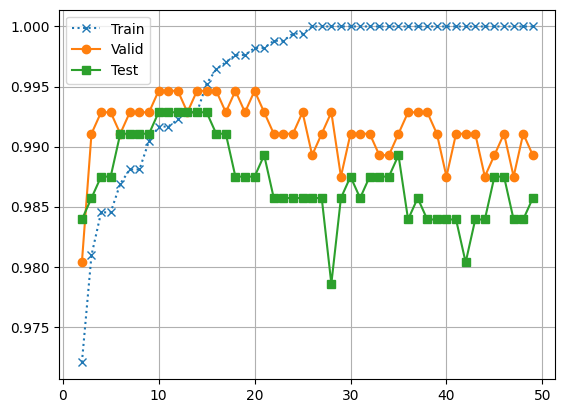

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split( X_train_80_enc, y_train_80, 
                                                         test_size=0.25)


accuracies_vary_max_leaves(X_train, X_valid, X_test_enc, 
                           y_train, y_valid, y_test,
                           l_min=2, l_max=50)

In [108]:
dt = DecisionTreeClassifier(max_leaf_nodes=32) # best on validation
dt.fit(X_train_80_enc,y_train_80)

train_acc = accuracy_score(y_true=y_train_80, y_pred=dt.predict(X_train_80_enc))
test_acc  = accuracy_score(y_true=y_test,  y_pred=dt.predict(X_test_enc))

print (f"Train Acc: {train_acc:.3f}" )
print (f"Test Acc : {test_acc:.3f}" )

Train Acc: 1.000
Test Acc : 0.989


# Can we investigate more the decision tree performance?

## Confusion Matrix

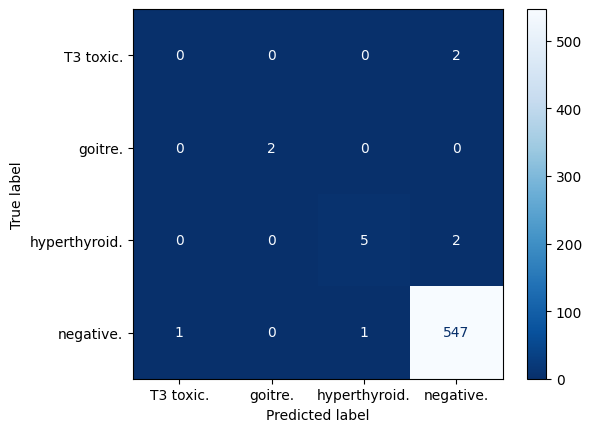

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    estimator=dt, 
    X=X_test_enc, y=y_test, 
    cmap = 'Blues_r');

In [110]:
from sklearn.metrics import confusion_matrix

conf_stat = confusion_matrix(y_true=y_test,  y_pred=dt.predict(X_test_enc))

conf_stat

array([[  0,   0,   0,   2],
       [  0,   2,   0,   0],
       [  0,   0,   5,   2],
       [  1,   0,   1, 547]])

## Accuracy Measures

Accuracy is defined as the fraction of correctly classified instances.

Especially with imbalanced data, accuracy may not be the best measure.

Rather, we can define different measure for each class. Precision, Recall and F-measure are very common


 - **Precision of class c**: $\frac{\text{\# instances correctly classified as}\ c}{\text{\# instances predicted as class}\ c}$  


 - **Recall of class c**: $\frac{\text{\# instances correctly classified as}\ c}{\text{\# instances  with true label}\ c}$ 
 

 - **F-measure**: harmonic mean of Precision and Recall $\frac{2\times\text{Precision}\times\text{Recall}}{\text{Precision}+\text{Recall}}$  


 - **$F_\beta$ weighted F-measure**: $\frac{(1+\beta^2)\times\text{Precision}\times\text{Recall}}{\beta^2\times\text{Precision}+\text{Recall}}$
   - meaning that recall is considered $\beta$  times as important as precision


For most measure we are interested in their average across classes, e.g., average precision, average recall.

We are interested in two main ways of computing the average:
 - **Macro**: statistics are computed independently for each class, and their average is taken:
   - macro-recall is the average of the recall values measured for each single class



 - **Weighted**: like macro, but weighted by class size (support). 
   - Classes with more instances have a larger impact on the final measure
   - provided by scikit learn, but not commonly used. 

   
- see https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report   

In [111]:
from sklearn.metrics import classification_report

class_rep = classification_report(y_true=y_test, y_pred=dt.predict(X_test_enc))

print (class_rep)

               precision    recall  f1-score   support

    T3 toxic.       0.00      0.00      0.00         2
      goitre.       1.00      1.00      1.00         2
hyperthyroid.       0.83      0.71      0.77         7
    negative.       0.99      1.00      0.99       549

     accuracy                           0.99       560
    macro avg       0.71      0.68      0.69       560
 weighted avg       0.99      0.99      0.99       560



## Cost sensitive

An interesting option is **Cost-Sensitive** Learning. The entries of the confusion metrics are associated with misclassification costs. When computing accuracy, the reward/penalty of correct/incorrect classification is not +1/-1 but the cost expressed in the cost matrix. 
 - This is not discussed further here, and it is not supported by scikit-learn.
 
 
 

## Let's give a weight to the various instances

In [112]:
%matplotlib inline

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def accuracies_vary_max_leaves(X_train, X_valid, X_test, y_train, y_valid, y_test,
                                weights=None,
                              l_min=2, l_max=50, l_step=1):

    accuracies = []

    for max_leaves in range(l_min,l_max, l_step):
        # train and predict
        dt = DecisionTreeClassifier( class_weight=weights,
                                     max_leaf_nodes=max_leaves)
        dt.fit(X_train,y_train)

        # compute Accuracy
        train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
        valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
        test_acc  = accuracy_score(y_true=y_test,  y_pred=dt.predict(X_test))

        accuracies += [ [max_leaves, train_acc, valid_acc, test_acc] ]

    accuracies = np.array(accuracies)

    fig, ax = plt.subplots()
    ax.plot(accuracies[:,0], accuracies[:,1], "x:", label="Train")
    ax.plot(accuracies[:,0], accuracies[:,2], "o-", label="Valid")
    ax.plot(accuracies[:,0], accuracies[:,3], "s-", label="Test")
    ax.legend()
    ax.grid()
    
    return accuracies

### Exercise: try different weights below

[13.          0.9922619   0.99285714  0.98928571]


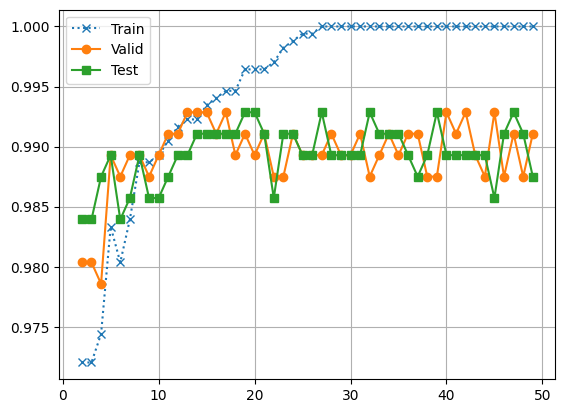

In [113]:
# try 1,100,100,100
weights = {'negative.':1, 'hyperthyroid.':2, 'T3 toxic.':3, 'goitre.':5}

accs = accuracies_vary_max_leaves( X_train, X_valid, X_test_enc, 
                                   y_train, y_valid, y_test,
                               weights=weights)

print (max(accs, key=lambda x:x[2]))

Train Acc: 0.993
Test Acc : 0.991


               precision    recall  f1-score   support

    T3 toxic.       0.50      1.00      0.67         2
      goitre.       1.00      1.00      1.00         2
hyperthyroid.       0.70      1.00      0.82         7
    negative.       1.00      0.99      1.00       549

     accuracy                           0.99       560
    macro avg       0.80      1.00      0.87       560
 weighted avg       0.99      0.99      0.99       560



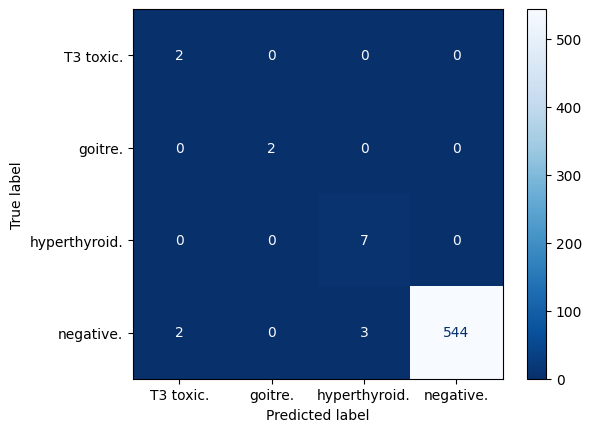

In [114]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

dt = DecisionTreeClassifier(class_weight=weights,
                             max_leaf_nodes=15)
dt.fit(X_train_80_enc,y_train_80)

train_acc = accuracy_score(y_true=y_train_80, y_pred=dt.predict(X_train_80_enc))
test_acc  = accuracy_score(y_true=y_test,  y_pred=dt.predict(X_test_enc))

print ("Train Acc: {:.3f}".format(train_acc) )
print ("Test Acc : {:.3f}".format(test_acc) )


class_rep = classification_report(y_true=y_test, y_pred=dt.predict(X_test_enc))
print (class_rep)

ConfusionMatrixDisplay.from_estimator(
    estimator=dt, 
    X=X_test_enc, y=y_test, 
    cmap = 'Blues_r');

Make weights inversely proportional to frequency.

[10.          0.98809524  0.9875      0.99285714]


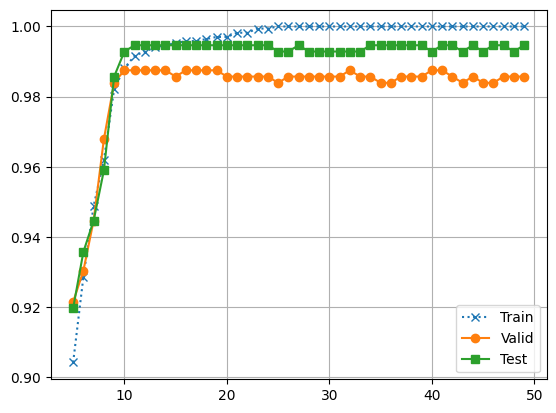

In [115]:
accs = accuracies_vary_max_leaves( X_train, X_valid, X_test_enc, 
                                   y_train, y_valid, y_test,
                                   weights='balanced',
                                   l_min=5, l_max=50)

print (max(accs, key=lambda x:x[2]))

Train Acc: 0.992
Test Acc : 0.995
               precision    recall  f1-score   support

    T3 toxic.       0.50      1.00      0.67         2
      goitre.       1.00      1.00      1.00         2
hyperthyroid.       0.88      1.00      0.93         7
    negative.       1.00      0.99      1.00       549

     accuracy                           0.99       560
    macro avg       0.84      1.00      0.90       560
 weighted avg       1.00      0.99      1.00       560



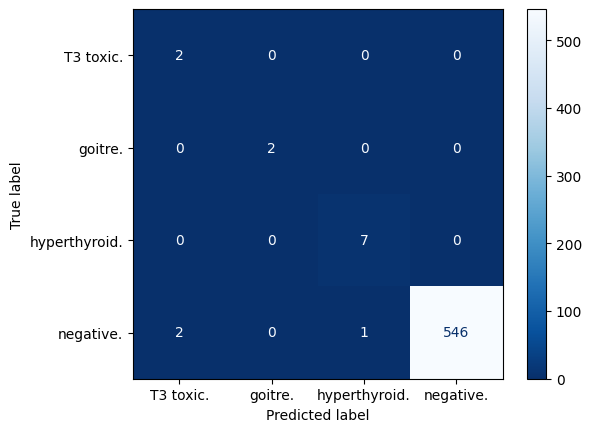

In [116]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay



dt = DecisionTreeClassifier(class_weight='balanced',
                             max_leaf_nodes=13)
dt.fit(X_train_80_enc,y_train_80)

train_acc = accuracy_score(y_true=y_train_80, y_pred=dt.predict(X_train_80_enc))
test_acc  = accuracy_score(y_true=y_test,  y_pred=dt.predict(X_test_enc))

print ("Train Acc: {:.3f}".format(train_acc) )
print ("Test Acc : {:.3f}".format(test_acc) )

class_rep = classification_report(y_true=y_test, y_pred=dt.predict(X_test_enc),
                                 target_names=label_enc.classes_)
print (class_rep)


ConfusionMatrixDisplay.from_estimator(
    estimator=dt, 
    X=X_test_enc, y=y_test, 
    cmap = 'Blues_r');


## Let's restrict ourselves to the task of predicting 'negative' against everyone else.

Now this is a **binary** classification task!

We should modify y accordingly and repeat the training.

Here we take a shortcut and exploit probability predicted by the model (decision tree).

In [117]:
y_test.value_counts()

29
negative.        549
hyperthyroid.      7
goitre.            2
T3 toxic.          2
Name: count, dtype: int64

In [118]:
dt.classes_

array(['T3 toxic.', 'goitre.', 'hyperthyroid.', 'negative.'], dtype=object)

In [119]:
y_binary_train = np.where(y_train=='negative.', 0, 1)
y_binary_valid = np.where(y_valid=='negative.', 0, 1)
y_binary_test  = np.where(y_test =='negative.', 0, 1)

In [120]:
y_binary_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [121]:
dt = DecisionTreeClassifier(class_weight="balanced",
                                 max_leaf_nodes=2)
dt.fit(X_train, y_binary_train)

DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=2)

In [122]:
dt.classes_

array([0, 1])

In [123]:
dt.predict(X_test_enc)[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [124]:
dt.predict_proba(X_test_enc)[:10]

array([[0.82638889, 0.17361111],
       [0.82638889, 0.17361111],
       [0.82638889, 0.17361111],
       [0.82638889, 0.17361111],
       [0.82638889, 0.17361111],
       [0.82638889, 0.17361111],
       [0.82638889, 0.17361111],
       [0.82638889, 0.17361111],
       [0.82638889, 0.17361111],
       [0.82638889, 0.17361111]])

- Usually we would use a threshold of 0.5 on `prob_positive` to distinguish among the two classes.

- In principle, we could use a different threshold.

- To do so, we need a proper evaluation measure.


### How to evaluate a binary classifier?

This is easier than the multi-class classifier.

Usually we identify a positive and a negative class and build a contingency table (similar to a confusion matrix)


|  | | | Predicted Label |
|---|---|---|---|
|  | | **Negative**| **Positive** |
| **Actual Label** | **Negative**| True Negatives| False Positives |
|              | **Positive**| False Negatives| True Positives |

Some interesting measures are:
 
 - **True Negative Rate**: $\frac{\text{\# True Negatives}}{\text{\# Total Negatives}}$

   - The importance of True Negative Rate (a.k.a. **specificity**) is apparent in the following examples:
     - in a cancer detection classifier, you want to be very very sure when predicting "No Cancer"
     - in a fraud detection classifier, you want to be very sure when predicting "No Fraud"




 - **True Positive Rate**: $\frac{\text{\# True Positives}}{\text{\# Total Positives}}$
   - This is the same as *recall*.
 

 
 
 - **False Positive Rate**: $\frac{\text{\# False Positives}}{\text{\# Total Negatives}}$



## Receiver Operating Characteristic (ROC) curves


- ROC curve for a given model shows the trade-off between the *true positive rate*  and the *false positive rate*.


- Usually you can tolerate a larger false positive rate to get an higher true positive rate, i.e., an higher *recall*. 

- Recall that our model (as many others) produces a probability score in [0,1] and the threshold 0.5 is implicitly used to predict class 0 vs. class 1. **What if the use a different threshold?**


- ROC curve is simply the plot of TPR against FPR. Every point of the curve corresponds to the pair (FPR,TPR) for a different *setting* (i.e., threshold) of the algorithm


- This is typical for a **binary** classification problem.


 - see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

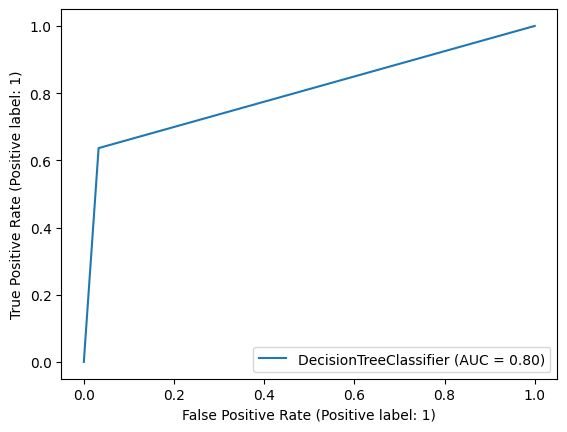

In [125]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(
    estimator=dt,
    X=X_test_enc, y=y_binary_test);

- ROC evaluates True Positive Rate and False Positive Rate for each decision threshold

- We can tune the True Positive Rate by using a threshold different from 0.5
  - with threshold equal to 1, FPR goes to 0
  - with threshold equal to 0, TPR goes to 1

Different applications may prefer a different trade-off. Usually you fix a desired True/False positive Rate and deduce the corresponding threshold.

- Usually, the figure in summarized in a single number by computing the **Area under ROC curve**, which measures the quality of the model across all thresholds.

In [126]:
from sklearn.metrics import roc_auc_score

auroc = roc_auc_score( y_true  = y_binary_test, 
                       y_score = dt.predict_proba(X_test_enc)[:,1])

print ("AUROC:", auroc)

AUROC: 0.8017883755588673


### ROC: Wrap up

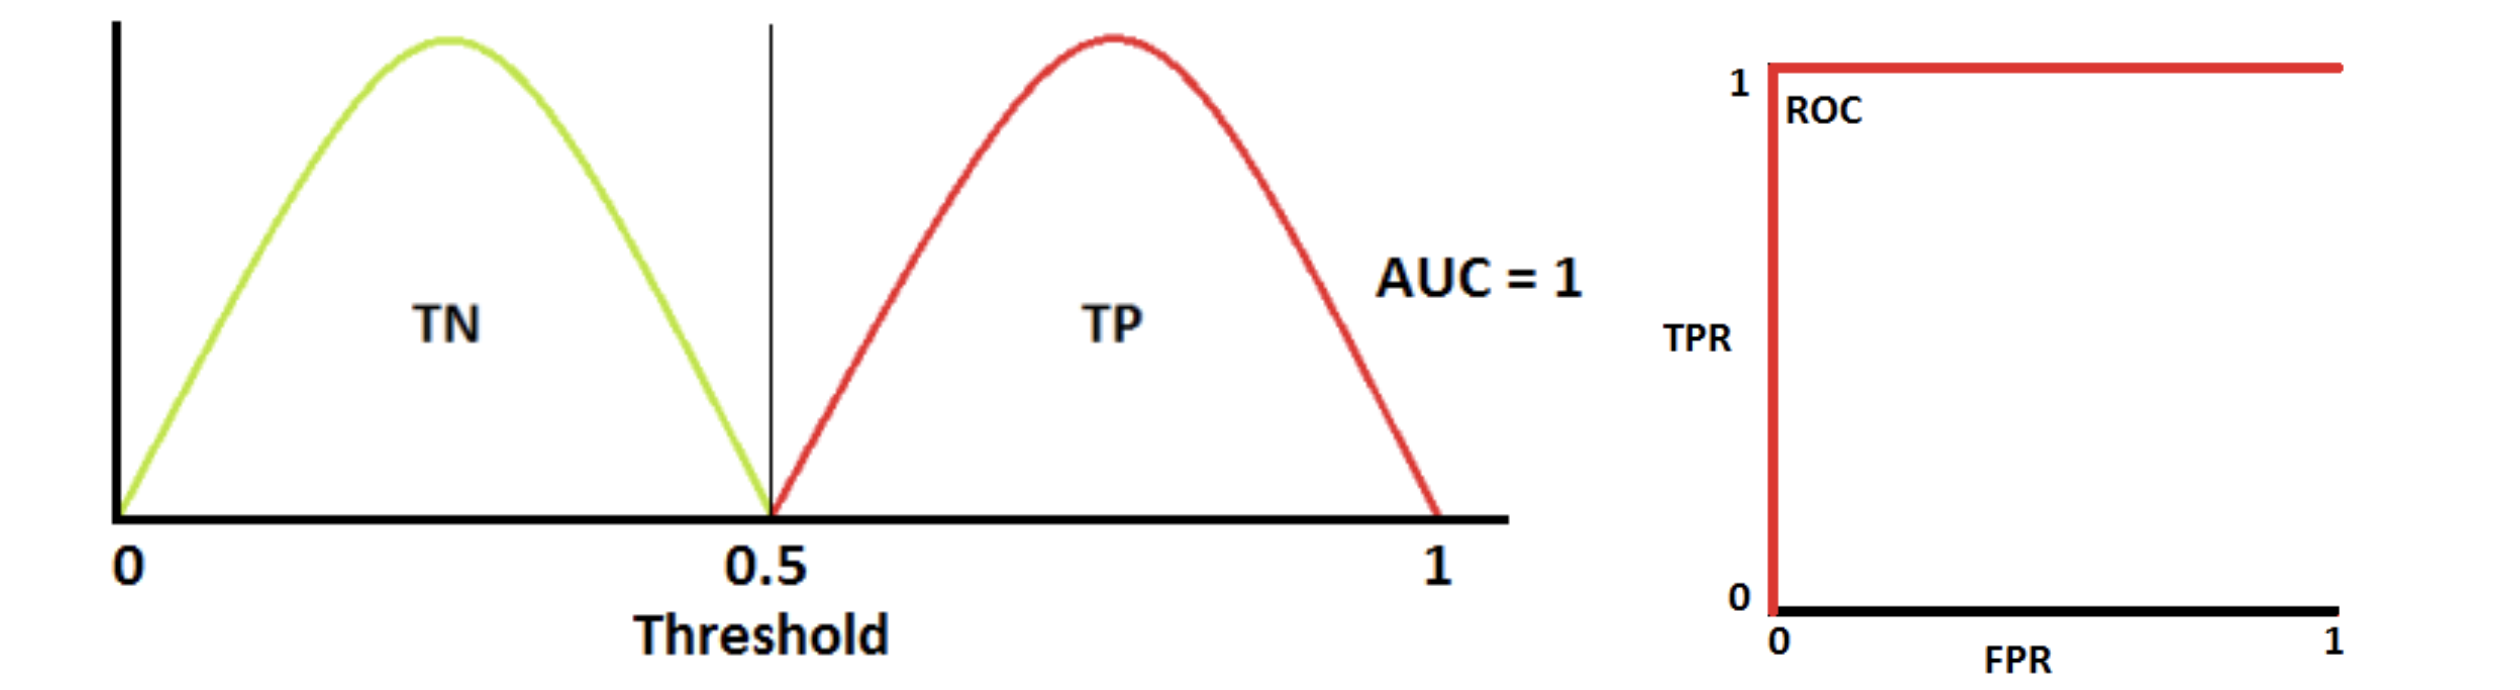

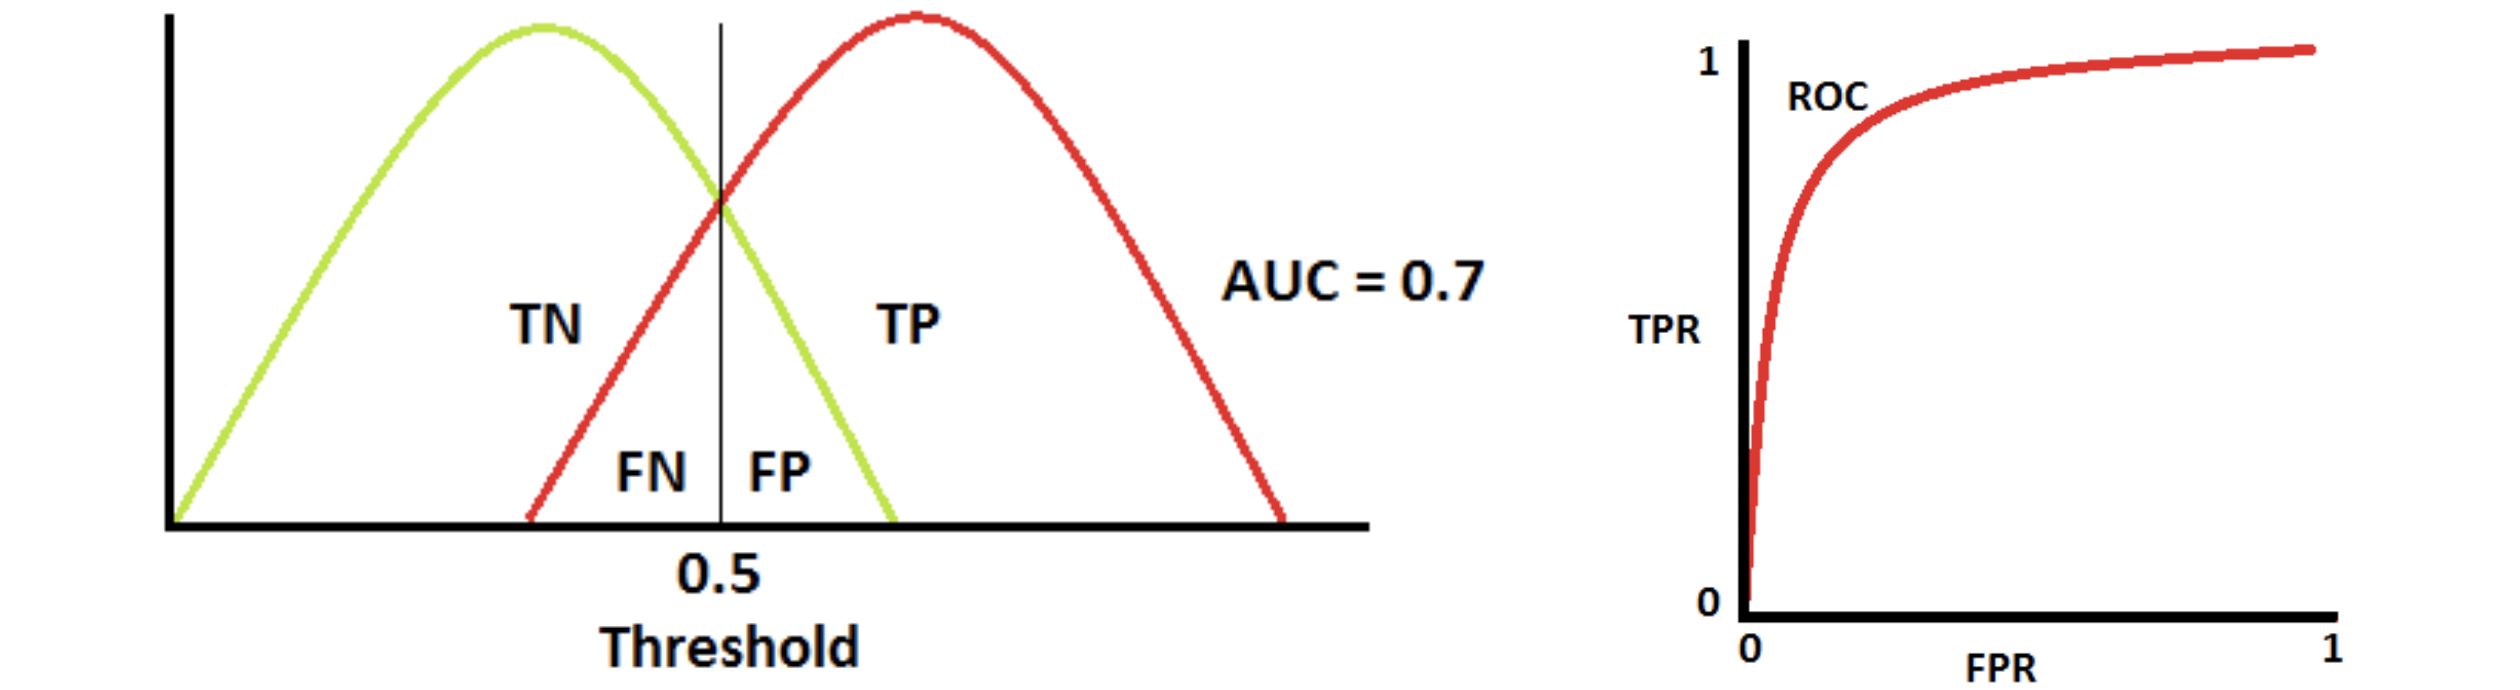

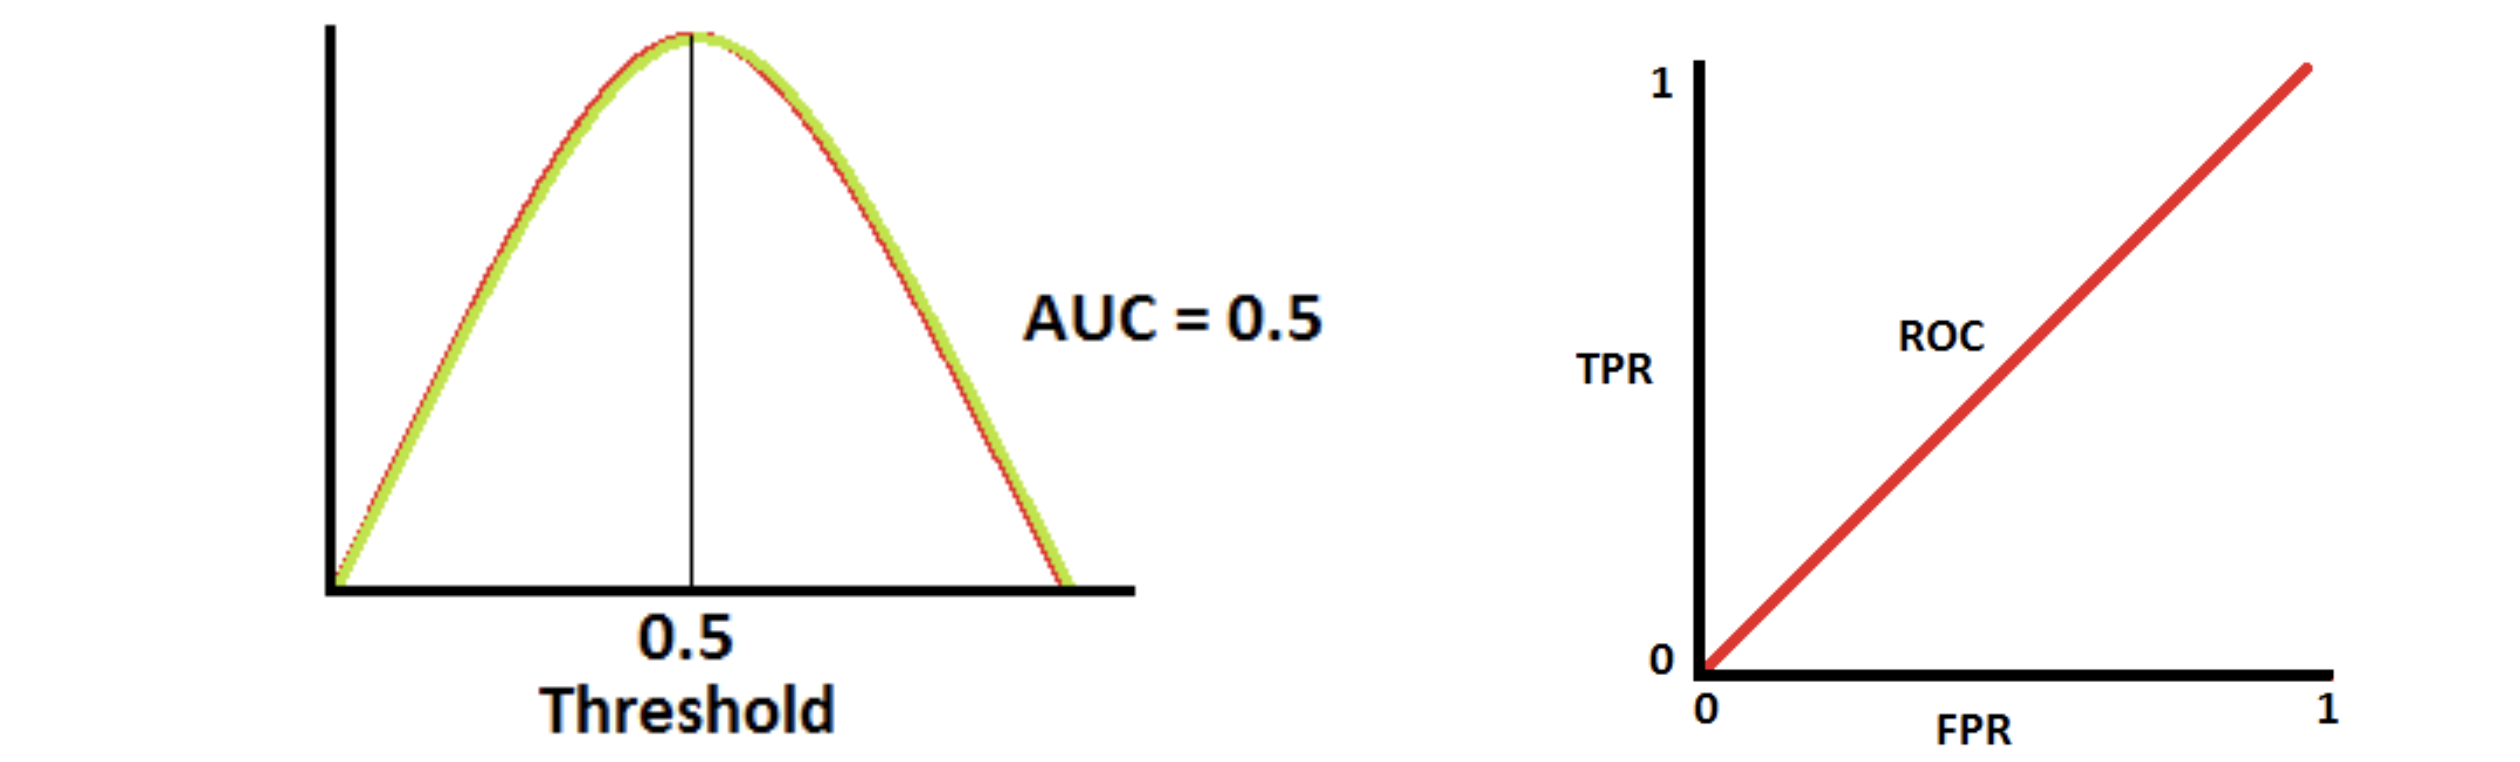

 (Image credits: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

## Summary

- Validation set should be used to find the best training hyper-parameters.

- A more robust estimation is achieved by k-fold cross-validation.

- We investigated the following hyper-parameters:
  - max number of leaves
  - weighting of training instances

- After cross validation, the full train dataset can be used to build the final model.

- Evaluation is always done on the test set

## References

- **Python Data Science Handbook**. O’Reilly. 2016
  - Chapter 5: Machine Learning - Feature Engineering

  